<a href="https://colab.research.google.com/github/Hakman482/CNN-model/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [2]:
img_height, img_width = 120, 120
batch_size= 32

In [3]:
data_dir = '/content/drive/MyDrive/newerDataset'
train_dir = '/content/drive/MyDrive/newerDataset/train'
valid_dir = '/content/drive/MyDrive/newerDataset/validation'

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed = 62,
    label_mode = 'categorical',
    image_size = (img_width, img_height),
    batch_size = batch_size,
    shuffle=False
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    seed = 62,
    label_mode = 'categorical',
    image_size = (img_width, img_height),
    batch_size = batch_size,
    shuffle=False

)

Found 228 files belonging to 3 classes.
Found 48 files belonging to 3 classes.


In [70]:
class_names = train_ds.class_names


['healthy', 'phase-ground', 'phase-phase']

In [6]:
data_augmentation = keras.Sequential([
      layers.experimental.preprocessing.RandomFlip(
          "horizontal",
          input_shape=(img_height, img_height, 3)
      ),
      layers.experimental.preprocessing.RandomFlip(
          "vertical",
          input_shape=(img_height, img_height, 3)
      ),
      layers.experimental.preprocessing.RandomRotation(0.1)
  ])

In [23]:
VVG19_model = Sequential()

pretrained_model = tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(img_height, img_height, 3),
    pooling='avg',
    classes=3,
    classifier_activation="softmax",
)

for layer in pretrained_model.layers:
    layer.trainable = False


VVG19_model.add(data_augmentation)
VVG19_model.add(pretrained_model)
VVG19_model.add(Flatten())
VVG19_model.add(Dense(128, activation='relu'))
VVG19_model.add(Dense(64, activation='relu'))
VVG19_model.add(Dense(3, activation='softmax'))

In [24]:
VVG19_model.build(input_shape=(None,img_width,img_height,3))
VVG19_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 120, 120, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 512)               20024384  
                                                                 
 module_wrapper_4 (ModuleWra  (None, 512)              0         
 pper)                                                           
                                                                 
 module_wrapper_5 (ModuleWra  (None, 128)              65664     
 pper)                                                           
                                                                 
 module_wrapper_6 (ModuleWra  (None, 64)               8256      
 pper)                                                           
                                                      

In [25]:
VVG19_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

In [26]:
epochs = 20
history = VVG19_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs =epochs,
    batch_size = batch_size
)

Epoch 1/20
8/8 [==============================] - 84s 10s/step - loss: 3.3279 - accuracy: 0.3026 - val_loss: 2.8801 - val_accuracy: 0.3750
Epoch 2/20
8/8 [==============================] - 76s 10s/step - loss: 2.1464 - accuracy: 0.3596 - val_loss: 2.1196 - val_accuracy: 0.5625
Epoch 3/20
8/8 [==============================] - 74s 9s/step - loss: 1.9736 - accuracy: 0.3947 - val_loss: 1.6481 - val_accuracy: 0.5833
Epoch 4/20
8/8 [==============================] - 66s 8s/step - loss: 1.6123 - accuracy: 0.5044 - val_loss: 1.3774 - val_accuracy: 0.6250
Epoch 5/20
8/8 [==============================] - 74s 10s/step - loss: 1.2766 - accuracy: 0.5351 - val_loss: 1.1910 - val_accuracy: 0.6250
Epoch 6/20
8/8 [==============================] - 64s 8s/step - loss: 1.0887 - accuracy: 0.5921 - val_loss: 1.0608 - val_accuracy: 0.6875
Epoch 7/20
8/8 [==============================] - 73s 9s/step - loss: 0.7981 - accuracy: 0.6754 - val_loss: 0.9638 - val_accuracy: 0.7292
Epoch 8/20
8/8 [===============

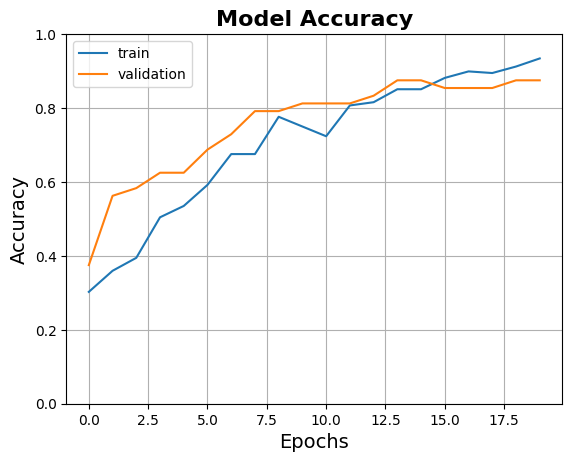

In [67]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0, ymax=1)
plt.grid()
plt.title('Model Accuracy',fontsize=16,weight='bold')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend(['train','validation'])
plt.show()


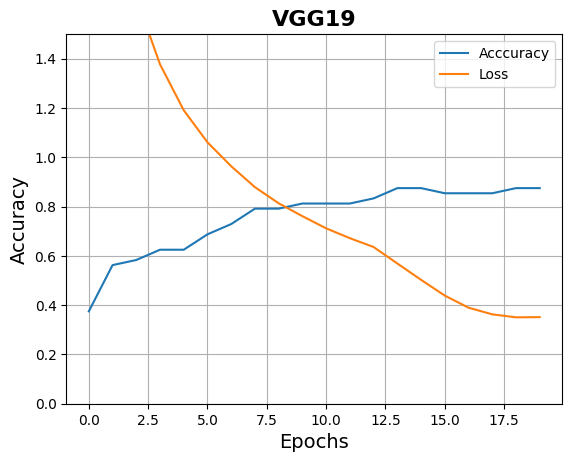

In [64]:
fig1 = plt.gcf()
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0, ymax=1.5)
plt.grid()
plt.title('VGG19',fontsize=16,weight='bold')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend(['Acccuracy','Loss'])
plt.show()


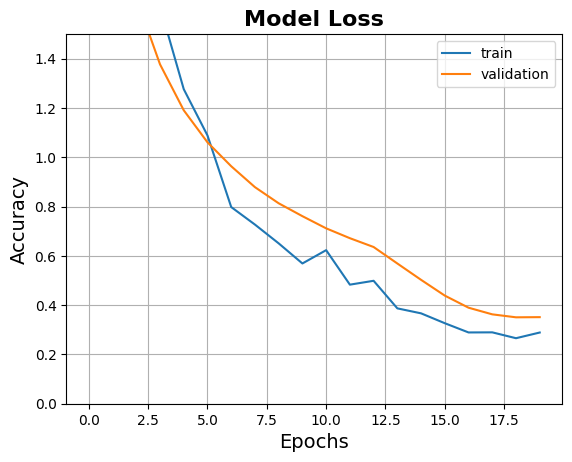

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0, ymax=1.5)
plt.grid()
plt.title('Model Loss',fontsize=16,weight='bold')
plt.ylabel('Accuracy',fontsize=14)
plt.xlabel('Epochs',fontsize=14)
plt.legend(['train','validation'])
plt.show()

In [42]:
predictions = VVG19_model.predict(val_ds)

2/2 [==============================] - 10s 3s/step


In [ ]:
predictions

In [44]:
rounded_predictions = np.argmax(predictions, axis=-1)
rounded_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2])

In [45]:
true_labels = []
labels = list(val_ds.map(lambda x, y: y))[0]
labels_1 = list(val_ds.map(lambda x, y: y))[1]
for label in labels:
  true_labels.append(np.argmax(label))

for label in labels_1:
  true_labels.append(np.argmax(label))

print(len(true_labels))
print(true_labels)

48
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [46]:
train_labels = []
labels = list(train_ds.map(lambda x, y: y))[0]
labels_1 = list(train_ds.map(lambda x, y: y))[1]
labels_2 = list(train_ds.map(lambda x, y: y))[2]
labels_3 = list(train_ds.map(lambda x, y: y))[3]
labels_4 = list(train_ds.map(lambda x, y: y))[4]
labels_5 = list(train_ds.map(lambda x, y: y))[5]
labels_6 = list(train_ds.map(lambda x, y: y))[6]
labels_7 = list(train_ds.map(lambda x, y: y))[7]


for label in labels:
  train_labels.append(np.argmax(label))

for label in labels_1:
  train_labels.append(np.argmax(label))

for label in labels_2:
  train_labels.append(np.argmax(label))

for label in labels_3:
  train_labels.append(np.argmax(label))

for label in labels_4:
  train_labels.append(np.argmax(label))

for label in labels_5:
  train_labels.append(np.argmax(label))

for label in labels_6:
  train_labels.append(np.argmax(label))

for label in labels_7:
  train_labels.append(np.argmax(label))


print(len(train_labels))
print(train_labels)

228
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [47]:
from sklearn.metrics import confusion_matrix
import itertools

In [48]:
cm = confusion_matrix(true_labels, rounded_predictions)

In [60]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  plt.imshow(cm, cmap=cmap)
  plt.title(title, weight='bold', fontsize=16)
  plt.colorbar()

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalize confusion matrix')
  else:
    print('Confusion Matrix, without normalization')
  print(cm)


  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",fontsize=16,weight='bold',
            color="white" if cm[i, j] > thresh else "black")


  plt.tight_layout()
  plt.ylabel('True label',fontsize=16)
  plt.xlabel('Predicted label',fontsize=16)

Confusion Matrix, without normalization
[[12  4  0]
 [ 1 14  1]
 [ 0  0 16]]


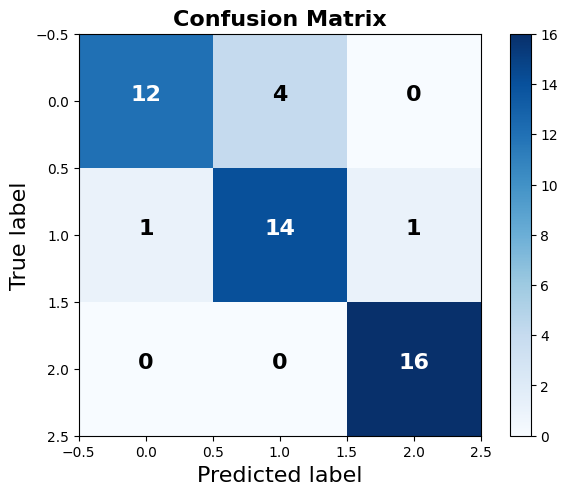

In [61]:
cm_plot_labels = ['healthy', 'phase', 'ground']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [51]:
from sklearn.metrics import classification_report
Y_pred = VVG19_model.predict(train_ds)
y_pred = np.argmax(Y_pred, axis=-1)


print(classification_report(train_labels, y_pred))
# y_pred

8/8 [==============================] - 55s 6s/step
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        76
           1       0.80      0.84      0.82        76
           2       0.93      0.92      0.93        76

    accuracy                           0.87       228
   macro avg       0.87      0.87      0.87       228
weighted avg       0.87      0.87      0.87       228

